### House Price Prediction Model
-Created a house price prediction model kalo data, incorporating advanced machine learning techniques to analyze factors like location, square footage, number of bedrooms, and market conditions. The model aims to predict home prices with high accuracy, offering valuable insights for real estate investors, buyers, and sellers to optimize their decision-making processes and stay ahead of market trends.

In [2]:
import pandas as pd # Importing all the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

housing_data = pd.read_csv('kalodatahousing.csv') # Reading the csv file in the same folder.
pd.set_option('display.max_rows', None) # this is used to display all the rows
housing_data # check if everything is correct by printing.



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
pd.reset_option('display.max_rows') # Reset the option if you don't need to see all the rows

In [4]:
# Assuming there are no missing values, we are doing data cleaning now.
# for missing value existence, we may use features later.
# Convert all the categoral varibles to numerical for modeling

housing_data['mainroad'] = housing_data['mainroad'].map({'yes': 1, 'no': 0})
housing_data['guestroom'] = housing_data['guestroom'].map({'yes': 1, 'no': 0})
housing_data['basement'] = housing_data['basement'].map({'yes': 1, 'no': 0})
housing_data['hotwaterheating'] = housing_data['hotwaterheating'].map({'yes': 1, 'no': 0})
housing_data['airconditioning'] = housing_data['airconditioning'].map({'yes': 1, 'no': 0})
housing_data['prefarea'] = housing_data['prefarea'].map({'yes': 1, 'no': 0})
housing_data['furnishingstatus'] = housing_data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
housing_data # you can see all data is numerical now



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [5]:
# Handle outliers, we are using capping with in the first and 99th percentile.
def cap_outliers(df, column): 
    lower_limit = df[column].quantile(0.01)
    upper_limit = df[column].quantile(0.99)
    df[column] = np.clip(df[column], lower_limit, upper_limit)

cap_outliers(housing_data, 'price')
cap_outliers(housing_data, 'area')
cap_outliers(housing_data, 'bedrooms')
cap_outliers(housing_data, 'bathrooms')
cap_outliers(housing_data, 'stories')
cap_outliers(housing_data, 'mainroad')
cap_outliers(housing_data, 'guestroom')
cap_outliers(housing_data, 'basement')
cap_outliers(housing_data, 'hotwaterheating')
cap_outliers(housing_data, 'airconditioning')
cap_outliers(housing_data, 'parking')
cap_outliers(housing_data, 'prefarea')
cap_outliers(housing_data, 'furnishingstatus')



In [6]:
# Now new features are created using the exisiting data 

# new feature 'total rooms' = bedroom + bathroom
housing_data['total_rooms'] = housing_data['bedrooms'] + housing_data['bathrooms']

In [7]:
# Split the data into traning and test sets 
X = housing_data.drop('price', axis=1)  # Features (independent variables)
y = housing_data['price']  # Target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler() # Feature scaling (normalization) for numeric columns
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating'
                , 'airconditioning', 'parking',
                'prefarea', 'furnishingstatus', 'total_rooms']
housing_data[numeric_features] = scaler.fit_transform(housing_data[numeric_features])

### Milestone 2: Model Development

     Model Selection
    Linear Regression and Random Forest for comparison is used

In [12]:
# Initialize the models
linear_regression_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [14]:
# train both models 
linear_regression_model.fit(X_train, y_train) # Train Linear Regression model
random_forest_model.fit(X_train, y_train) # Train Random Forest model


RandomForestRegressor(random_state=42)

In [18]:
# Evaluate both models using RMSE and R-squared metrics

y_pred_lr = linear_regression_model.predict(X_test) # Predict with Linear Regression model
y_pred_rf = random_forest_model.predict(X_test) # Predict with Random Forest model
mse_lr = mean_squared_error(y_test, y_pred_lr) # Evaluate Linear Regression model
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf) # Evaluate Random Forest model
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - RMSE: {rmse_lr}, R2: {r2_lr}")
print(f"Random Forest - RMSE: {rmse_rf}, R2: {r2_rf}") 

Linear Regression - RMSE: 1207381.1428302627, R2: 0.6755436405730457
Random Forest - RMSE: 1302456.7189315131, R2: 0.6224329258691037


### Milestone 3: Model Refinement and Reporting

In [23]:
# Model Optimization, according to previous results, liear Regression is likely to perform better

random_forest_model_optimized = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
random_forest_model_optimized.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [25]:
# Evaluate the optimized model
y_pred_rf_optimized = random_forest_model_optimized.predict(X_test)
mse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized)
rmse_rf_optimized = np.sqrt(mse_rf_optimized)
r2_rf_optimized = r2_score(y_test, y_pred_rf_optimized)

print(f"Optimized Random Forest - RMSE: {rmse_rf_optimized}, R2: {r2_rf_optimized}")

Optimized Random Forest - RMSE: 1304381.5377099835, R2: 0.6213161360494541


In [27]:
# Model Interpretation
# feature importance from Random Forest
importances = random_forest_model_optimized.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
0,area,0.475006
12,total_rooms,0.107842
2,bathrooms,0.087371
8,airconditioning,0.056279
3,stories,0.053923
11,furnishingstatus,0.051655
9,parking,0.046068
10,prefarea,0.031655
6,basement,0.030754
7,hotwaterheating,0.019051


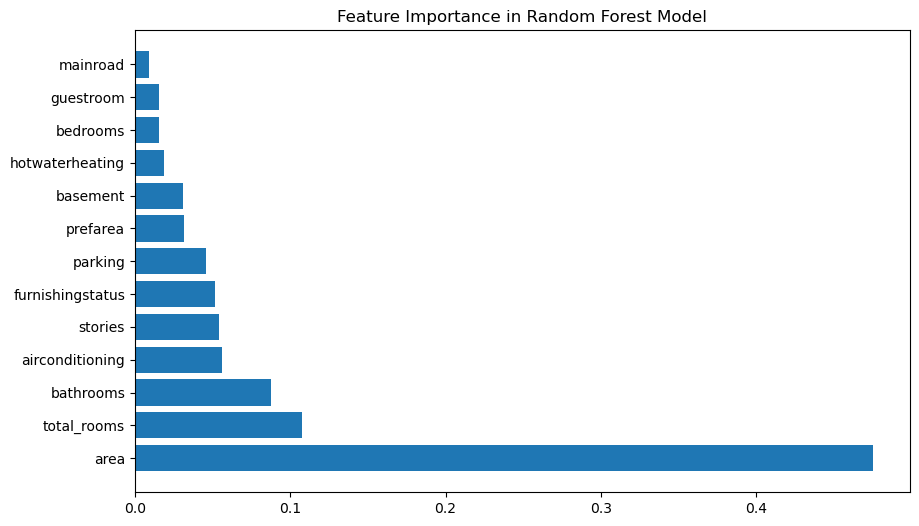

In [29]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Linear Regression - RMSE: 1207381.1428302627, R2: 0.6755436405730457
# Random Forest - RMSE: 1302456.7189315131, R2: 0.6224329258691037
# Linear Regression performed better, with a lower RMSE and a higher R² score than the Random Forest model.
While Random Forest models typically perform well on complex datasets, the simpler Linear Regression model outperformed it.